# PS03 From complete markets to rational expectations business cycle models

*Submit your answers as a Jupyter Notebook. Late assignments will not be graded.*

### Key Learning Points

* Applying recursive competitive equilibrium (under rational expectations), or RCE concept in two well-known models in macro

* Connecting RCE concept to dynamic programming and Euler functional equations

    * Application to a real business cycle model
    
    * Extension/modification of RBC towards a popular New Keynesian monetary-policy framework

* Solving special-case, linear approximation of (first-order perturbation about a steady state solution) Euler functional equation

    * Equivalently, solving a system of forward looking and backward looking difference equations (DEs)
    
    * Eigenvalue-eigenvector decomposition and connection to saddle-path stable equilibrium dynamics:
    
        * forward-looking DEs without initial condition are connected to unstable eigenvalues
        
        * backward-looking DEs with initial conditions are connect to stable eigenvalue
        
        * Earlier lessons from reduced-from rational expectations macroeconometric models (see Dornbusch 1976 as example)
        
        * Same techniques adapted to solving stochastic (linearized) Euler functional systems arising from RCE (e.g. in RBC and NK models)



* Connection between model solution and a time-series data generating process

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas
import warnings

%matplotlib inline

## Problem 1 (RBC with labor disutility)

Consider a real business cycle model. Let $C$ be consumption, $N$ be labor hours, $K$ be capital stock, $Y$ be output and $A$ be exogenous total factor productivity. When we write $X_{t}$, we mean $X_{t} := X(K_{t}, A_{t})$ (i.e, a time-invariant function of relevant aggregate states). 

Our model economy consists of a measure-1 population identical agents (so aggregate outcomes also have the interpretation of average outcomes). 

The representative agent's preference is described by
$$
\mathbb{E}_{0} \sum_{t=0}^{\infty} \beta^{t} \left( \ln C_{t} - \eta N_{t} \right).
$$

The resource and technological constraint in this economy is given by
$$
C_{t} + K_{t+1} = Y_{t} + (1-\delta)K_{t}
$$
$$
Y_{t} = A_{t} K_{t}^{\alpha}N_{t}^{1-\alpha}
$$
$$
A_{t} = A_{ss}^{1-\rho}A_{t-1}^{\rho}\exp\{s_{t}\},
$$
where $\delta, \alpha, \rho, \beta \in (0,1)$, $A_{ss}$ and $\eta$ are positive-valued, and $s_{t} \sim \text{i.i.d.}(0,\sigma^{2})$. 

The exogenous random state $A_{t}$ is realized at the beginning of period $t$ and $K_{t+1}$ is determined thereafter in period $t$.

Note: Since $A$ is the only source of aggregate risk in the economy, the expectations operator is an integral operator with respect to the conditional distribution of $A_{t}$, given $A_0$ ---i.e., $\mathbb{E}_0 := \mathbb{E}\{\cdot | A_{0}\}$. Also $A_{t}$ is a Markov process.




### Question 1.1

Write down the social planner's Bellman equation.

#### Answer

Let $X := X_{t}$ and $X_{+1} := X_{t+1}$ for any variable $X$.

Let the feasible action correspondence be

$$
\Gamma(K,A) := \left\{ (K',N) \in \mathbb{R}_{+}^{2} : K' \in [0,A_{t} K^{\alpha}N^{1-\alpha} + (1-\delta)K] \right\}.
\tag{1.1}
$$

The planner's Bellman equation is

$$
V(K, A) = \max_{(K_{+1}, N) \in \Gamma(K,A)} \left\{ \ln\left[A K^{\alpha}N^{1-\alpha} + (1-\delta)K - K_{+1}\right] - \eta N + \beta \mathbb{E}\left[ V(K_{+1}, A_{+1})| A \right] \right\}.
\tag{1.2}
$$


### Question 1.2

Characterized the optimal allocations under the social planner' problem.

#### Answer

Given an initial state $(K,A)$, a *social optimum* is a social value function $(K,A) \mapsto V(K,A)$ and a $\mathbb{R}_{+}^{2}$-valued allocation function $(K,A) \mapsto g(K,A)$---i.e., where $g = (g_{K}, g_{N})$---such that for every current state $(K,A)$:
$$
g(K, A) = \text{arg}\max_{(K_{+1}, N) \in \Gamma(K,A)} \left\{ \ln\left[A K^{\alpha}N^{1-\alpha} + (1-\delta)K - K_{+1}\right] - \eta N + \beta \mathbb{E}\left[ V(K_{+1}, A_{+1})| A \right] \right\}.
$$
and,
$$
V(K, A) = \ln\left[A K^{\alpha}(N^\star)^{1-\alpha} + (1-\delta)K - K^{\star}_{+1}\right] - \eta (N^\star) + \beta \mathbb{E}\left[ V(K^{\star}_{+1}, A_{+1})| A \right],
$$
where
* $K_{+1}^{\star}= g_{K}(K,A)$
* $N^{\star} = g_{N}(K,A)$




For given $(K,A)$, the following necessary (and sufficient, because the math programming problem is convex) conditions characterize this optimum:

* Resource feasibility:
    $$
    C^{\star} = A K^{\alpha}(N^\star)^{1-\alpha} + (1-\delta)K - K^{\star}_{+1}.
    $$
* Labor allocation:
    $$
    (1-\alpha) A \left(\frac{K}{N^\star}\right)^{\alpha} = \frac{\eta}{(C^{\star})^{-1}}.
    $$

    * This says that a socially optimal labor allocation would equate the marginal productivity of labor (LHS) to the marginal rate of substitution between labor and consumption (RHS).
    
    * The planner internalizes the market return of labor services and equates that to preference-driven opportunity cost of leisure.

* Capital allocation:
    $$
    \frac{1}{C^{\star}} + \beta \mathbb{E}\left[ V_{K}(K^{\star}_{+1}, A_{+1})| A \right],
    $$
    where the envelop condition (marginal value of wealth) is
    $$
    V_{K}(K_{+1}^{\star}, A_{+1}) = \frac{1}{C^{\star}_{+1}}\left[ \alpha A \left(\frac{K_{+1}^{\star}}{N_{+1}^{\star}}\right)^{\alpha-1} + (1-\delta)\right]
    $$
    almost everywhere, i.e., for all measurable continuation states $(K_{+1}^{\star}, A_{+1})$. These two conditions give you the consumer's Euler equation.
   

### Question 1.3

Suppose now the planner does not exist and the allocation procedure is determined through a centralized Walrasian market. There is the representative household that owns labor and capital, who rents it to a competitive firm via competitive factor markets. The firm produces an output that can be either consumed or invested into more capital by the household.

* Distinguish between individual state variables and aggregate state variables. What are these, respectively? Hint: Use the little-$k$ vs big-$K$ convention.

* Be precise about the dependency of variables of the notion of state variables. Write down the household Bellman equation and characterize its optimal contingent plan.

* Define the firm's optimization problem and characterize its optimal contingent plan.

* Define a *recursive* competitive equilibrium (with rational expectations) for this economy.

#### Answer

**Household problem**

Denote the sequential budget constraint as:
$$
c + a_{+1}  \leq [r(K, A) + (1-\delta)]a + w(K,A)n.
\tag{SBC}
$$

Households take relative prices on labor and capital, $w(K,A)$ and $r(K,A)$ as given. Given the aggregate states, they need to forecast the future aggregate states to calculate expected future payoff (i.e., continuation value). Let the following mapping $G$ denote the household's perceived law of motion (PLM) for the aggregate state:
$$
(K_{+1}, A_{+1}) = G(K, A).
\tag{PLM}
$$

The household solves

$$
v(a, K, A) = \max_{c, n, a_{+1}} \left\{ \ln (c) - \eta n + \beta \mathbb{E}\left[ v(a_{+1}, K_{+1}, A_{+1})| A \right] : \text{(SBC) and (PLM)} \right\}
$$

for any given $(a,K,A)$.

The following derivations characterize an optimal plan for the household, given aggregate prices:

* Optimal effort (hours):
    $$
    \eta c = w(K,A)
    \tag{Labor supply}
    $$
    
* Optimal saving:
    $$
    1 = \beta \mathbb{E}\left\{ \frac{c}{c_{+1}} R(K_{+1},N_{+1})| A\right\}
    \tag{Capital supply}
    $$
    
* Feasibility:
    $$
    c + a_{+1}  = R(K,A)a + w(K,A)n
    \tag{SBC}
    $$

where we have written
    $$
    R(K,A) := [r(K, A) + (1-\delta)].
    $$
 
So, if we had solved the household DP problem or equivalently the Euler equation system, we can work out the household's optimal (stationary Markovian) decision function, $d$:
$$
(c, n, a_{+1}) = d(a, K, A).
$$

**Firm's problem**

The price-taking representative firms hire aggregate capital and labor services, respectively $K$ and $N$ to maximize profit. 

The firm's problem is
$$
\max_{K,N} A K^{\alpha}N^{1-\alpha} - r(K,A)K - w(K,A)N
$$
each period.

Thus the firm's optimal production plan is described by two static decision functions, implicit in these FOCs:

* Optimal labor demand:
    $$
    w(K,N) = (1-\alpha)A \left(\frac{K}{N}\right)^{\alpha}
    \tag{Labor demand}
    $$
    
* Optimal capital demand:
    $$
    r(K,N) = \alpha A \left(\frac{K}{N}\right)^{\alpha-1}
    \tag{Capital demand}
    $$



**Market clearing**

* Goods:
    $$
    C + K_{+1} - (1-\delta)K = A K^{\alpha}N^{1-\alpha}
    \tag{Goods clearing}
    $$

* Labor: (Labor supply) = (Labor demand). This gives a (Labor clearing) condition.

**Rational expectations consistency of actions and beliefs**

The PLM $G(K, A)$ is governed by

* $K_{+1} = (1-\delta)K + A K^{\alpha}N^{1-\alpha} - C$

* $A_{t} = A_{ss}^{1-\rho}A_{t-1}^{\rho}\exp\{s_{t}\}$ and $s_{t} \sim \text{i.i.d.}(0,\sigma^{2})$

Or equivalently, we require an aggregate policy function $D(K,A)$ to be described by

* $K = \int_{0}^{1} a \text{d}i = a$

* $C = \int_{0}^{1} c \text{d}i = c$

* $N = \int_{0}^{1} n \text{d}i = n$

where the representative agent assumption (with constant population of size 1) is tantamount to saying individuals' actions are uniformly distributed $[0,1]$. That's why we can invoke the $K=a$ condition here. 

(Note: The last statement would not be true in an heterogeneous agent model, as e.g., the equilibrium-determined distribution of individual assets is not uniform. Check out our final lecture!)




**DEFINITION**. A (rational expectations) *recursive competitive equilibrium* (RCE) is 
* a value function $(a,K,A) \mapsto v(a,K,A)$ 
* an individual policy function $(a,K,A) \mapsto d(a,K,A)$ inducing outcomes $(c,n,a_{+1})$
* an aggregate policy function $(K,A) \mapsto D(K,A)$ inducing outcomes $(C,N,K_{+1})$
* pricing functions 
    * $(K,A) \mapsto R(K,A)$ 
    * $(K,A) \mapsto w(K,A)$

satisfying:
1. The household Bellman equation, which implies (Consumption demand), (Labor supply) and (Capital supply)
2. Firm's profit maximization, which implies (Labor demand) and (Capital demand)
3. Market clearing: (Goods clearing) and (Labor clearing)
4. Consistency between individual actions and aggregate actions: $d(a,K,A) = D(K,A)$. [NB: Equivalently, (PLM) $G(K,A)$ coincides with the actual law of motion of $(K,A)$.]


This definition just gives us the complete set of simultaneous (functional) equations solving for the same set unknowns (i.e., allocation and pricing functions). But these are just "derive the demand and supply functions and impose demand-equals-supply conditions for each market".


### Question 1.4

*The purpose of this exercise is for you to learn first-hand how the linear perturbation technique works for a small problem which can be solved by hand. For bigger models there are canned software like [DYNARE](https://www.dynare.org/) (Matlab based) or [DOLO](https://github.com/EconForge/dolo) (Python and Julia based).*

Use the log-linear first-order perturbation approximation technique to approximate the conditions characterizing a recursive competitive equilibrium.

* Write down the original nonlinear model's equilibrium conditions at the deterministic steady state. Then solve for the equilibrium capital-labor ratio ($K_{ss}/N_{ss}$), consumption level ($C_{ss}$), capital stock ($K_{ss}$), and employment ($N_{ss}$), at the non-stochastic steady state.

* Define the percentage deviation of a variable $X$ from its deterministic steady state point as $\hat{x}_{t} = \ln(X_{t}) - \ln(X_{ss})$. From the RCE conditions you may have linear sums of nonlinear functionals. Take a first-order Taylor series approximation of these separate nonlinear functionals and express the resulting log-linearized functional equation system in terms of variables in percentage deviations from steady state.

    (Hint: You may invoke the fundamental welfare theorem and solve the planner's allocation first, and then construct equilibrium pricing functions afterward. See [these notes for an example](https://www.dropbox.com/s/jwhscnvsojpdp1h/08rbclinear.pdf?dl=0).) 



#### Answer

*Comment*: 

* We have previously solved the planner's DP problem in a version of RBC using nonlinear, *global* methods. We did that by solving the Bellman operator, and alternatively, we also solved its corresponding Euler operator to get the policy function. 

* Here we're going back to the early 1980s where computing power was limited. This method is the same as solving the Euler operator (and its related system of equations), except we solve its auxiliary version: a locally-accurate polynomial (here, first-order) approximation of the original nonlinear conditions in the Euler equation system. As a result, the local approximant for the decision function will also be polynomial (here, linear) in the state variables. 

* Instead of taking a literal linear approximation, we do a transform and write it down as a log-linear system, since interpretation-wise, we can measure the outcomes as percentage deviations from some reference point (here, the deterministic steady state of the model).

* Linearized systems are useful as a first pass to help us understand the (local) dynamic behavior of a complicated model. Humans tend to understand linear relationships better. Also, econometrically, if one were to estimate such model, say using maximum likehood (ML) or Bayesian model posterior sampling, one has to solve the model very quickly, over and over (typically millions of times) as one searches for the ML estimator or the Bayesian posterior estimator. Solving a linearized system is fast: it typically requires just a few microseconds on a notebook computer.

*Step 1*. Collect RCE and simplify.

From the RCE definition, we can reduce the RCE system down to this below:
* Capital supply:
    $$
    C^{-1} = \beta \mathbb{E}\left\{ C_{+1}^{-1}  R_{+1} \bigg{|} A \right\}
    \tag{Capital clearing}
    $$
    
* Capital demand:
    $$
    R = \alpha A \left(\frac{K}{N}\right)^{\alpha-1} + (1 - \delta)
    \tag{Capital demand}
    $$

* Goods market clearing:
    $$
    C + K_{+1} - (1-\delta)K = A K^{\alpha}N^{1-\alpha}
    \tag{Goods clearing}
    $$

* Labor market clearing:
    $$
    \eta C = (1-\alpha)A \left(\frac{K}{N}\right)^{\alpha}
    \tag{Labor clearing}
    $$

This system solves for the unknown RCE policy function
$$
(C,N,K_{+1}) = G(K,A).
\tag{RCE solution}
$$

*Step 2*. Define a reference point.

In this model, we have a unique *non-stochastic steady state*. (Why unique? Prove it!) So let's use that as the reference point, around which we will be analyzing the model's *local* dynamics. So "local" here refers to within a small neighborhood of the reference point.

A deterministic steady state equilibrium is one where the state is at a constant and not random. (This is an "as-if" idea of an equilibrium free of shocks and motion.) Here, the steady state equilibrium is given by these conditions (embedding optimal responses):

* Capital market clearing:
    $$
    1 = \beta \left[\alpha A \left(\frac{K}{N}\right)^{\alpha-1} +(1-\delta)\right]
    $$

* Goods market clearing:
    $$
    C + \delta K = A K^{\alpha}N^{1-\alpha}
    $$

* Labor market clearing:
    $$
    \eta C = (1-\alpha)A \left(\frac{K}{N}\right)^{\alpha}
    $$

This system solves for the unknown steady state equilibrium fixed point in $\mathbb{R}^{3}$:
$$
(C_{ss},N_{ss},K_{ss}) = G(K_{ss},A_{ss}).
$$

In this instance, we can solve the conditions above by hand given model parameters. (We'll figure out how to estimate and calibrate the parameters below!)


*Step 3*. Obtain auxiliary RCE conditions - the (log)-linearized version of the original nonlinear RCE system.

Let $\hat{x} := \ln(X/X_{ss}) \approx \frac{X - X_{ss}}{X_{ss}}$, where the perturbation about $X_{ss}$ is "small". Also, note that $\mathbb{E}_{t} := \mathbb{E}[\cdot | \hat{a}_{t}]$.

We linearize each linearly separable non-linear term in the RCE conditions separately (and "inside" the expectations/integral operator, which is a linear operator). Let's start with (Capital clearing):
$$
-C_{ss}\hat{c}_{t} = \mathbb{E}_{t} \left\{ -\beta C_{ss}R_{ss}\hat{c}_{t+1} + \beta C_{ss}R_{ss}\hat{r}_{t+1} \right\} +\mathcal{O}(\| \hat{a}_{t} \|^{2})
$$



(The last term just says approximation error from ignored second-order and higher terms.) Since from the steady-state Euler condition we have the restriction $\beta R_{ss} = 1$, then the above simplifies to
$$
-\hat{c}_{t} \approx \mathbb{E}_{t} \left\{ -\hat{c}_{t+1} + \hat{r}_{t+1} \right\}
$$
where
$$
R_{ss} = \alpha \frac{Y_{ss}}{K_{ss}} + (1-\delta).
$$

From (Capital demand), we can derive:
$$
\begin{split}
R_{ss}\hat{r}_{t} &\approx \alpha \left(\frac{Y_{ss}}{K_{ss}}\right)(\hat{y}_{t} - \hat{k}_{t})
\\
& = \alpha \left(\frac{Y_{ss}}{K_{ss}}\right)\left[\hat{a}_{t} - (1-\alpha) \left(\hat{k}_{t} - \hat{n}_{t}\right)\right]
\end{split}
$$



The final-good market clearing condition becomes:
$$
C_{ss}\hat{c}_{t} + K_{ss}\hat{k}_{t+1} - (1-\delta)K_{ss}\hat{k}_{t} \approx Y_{ss}\left[\hat{a}_{t} + \alpha \hat{k}_{t} + (1-\alpha)\hat{n}_{t}\right],
$$
where
$$
Y_{ss} = A_{ss} K_{ss}^{\alpha}N_{ss}^{1-\alpha}.
$$

Since the expression in the labor market clearing condition can be divided on both sides by its own version at a deterministic steady state, the following log-linear relation is exact (there is no approximation error from here):
$$
\hat{c}_{t} = \hat{a}_{t} + \alpha\left[\hat{k}_{t} - \hat{n}_{t}\right].
$$


(Computationally, we will pretend for these log-linearized relations to hold at equality later!)

### Question 1.5

Show that the system you have just derived can be simplified to        
$$
\left[\begin{matrix}\hat{k}_{t+1}\\ \mathbb{E}_{t}\hat{c}_{t+1}\end{matrix}\right]=\mathbf{M}\left[\begin{matrix}\hat{k}_{t}\\ \hat{c}_{t}\end{matrix}\right]+\mathbf{L}\hat{a}_{t}.
$$

List what the elements of $\mathbf{M}$ and $\mathbf{L}$ are in terms of the deep parameters and steady-state ratios of variables. (Be careful with your algebra here because your numerical results depend on this.)


#### Answer



Eliminating $\hat{n}_{t}$ and $\hat{n}_{t+1}$ using the labor market clearing equation above, 
we have

$$
\mathbb{E}_{t} \left\{ \hat{c}_{t+1} \right\} \approx \left[1+(1-\alpha)\frac{\beta Y_{ss}}{K_{ss}}\right]^{-1}\left[ \hat{c}_{t}  + \beta \left( \frac{Y_{ss}}{K_{ss}} \right) \rho \hat{a}_{t} \right]
\tag{LRCE-1}
$$

and

$$
\hat{k}_{t+1}  
\approx 
\left[(1-\delta) + \frac{Y_{ss}}{K_{ss}}\right]\hat{k}_{t}
-
\left[ \frac{C_{ss}}{K_{ss}} + \frac{Y_{ss}}{K_{ss}}\left(\frac{1-\alpha}{\alpha}\right)\right]\hat{c}_{t}
+
\frac{Y_{ss}}{K_{ss}}\left(\frac{1}{\alpha}\right)\hat{a}_{t}
\tag{LRCE-2}
$$

Now we proceed to put this into matrix form. You could do all this all by hand, but here let's check out ``SymPy``:

In [2]:
# Do symbolic math
from sympy import *
# Render pretty math in SymPy
init_printing() 

# Bind symbols - model parameters
alpha = symbols('alpha')
beta = symbols('beta')
rho = symbols('rho')
delta = symbols('delta')
eta = symbols('eta')
Y_ss = symbols('Y'+'_ss')
K_ss = symbols('K'+'_ss')
C_ss = symbols('C'+'_ss')
params = Matrix([alpha, beta, rho, delta, eta, Y_ss, K_ss, C_ss])

# Bind symbols  - variables - exogenous
a = symbols('\hat{a}')
var_exog = Matrix([a])

# Bind symbols  - variables - endogenous
k = symbols('\hat{k}')
c = symbols('\hat{c}')
var_endo = Matrix([k, c])

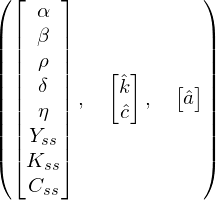

In [3]:
params, var_endo, var_exog

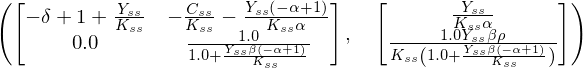

In [4]:
# Resource constraint (LRCE-2)
m11 = (1-delta) + Y_ss/K_ss
m12 = - (C_ss/K_ss + (1-alpha)*Y_ss/(alpha*K_ss))

# Euler equation (LRCE-1)
m21 = 0.0
m22 = 1.0/(1.0 + (1-alpha)*beta*(Y_ss/K_ss))

# Our M matrix
M = Matrix( [[m11, m12],
             [m21, m22]] )

# Noise term (LRCE-2)
l11 = Y_ss/(alpha*K_ss)

# Noise term (LRCE-1)
l21 = m22*beta*rho*(Y_ss/K_ss)

# Our L matrix
L = Matrix([[l11], [l21]])

# Display to screen
M, L

### Question 1.6

Once you have populated $\mathbf{M}$ and $\mathbf{L}$ from the last section, solve the linear(ized) Euler functional equation system using the following linear decision functions as a guess for its fixed point solution:
$$
\hat{k}_{t+1} = P\hat{k}_{t} + Q\hat{a}_{t}
$$
and
$$
\hat{c}_{t} = R\hat{k}_{t} + S\hat{a}_{t}.
$$
A locally stable rational expectations equilibrium requires that $\vert P \vert \lt 1$. Solve for $P$ and then $(Q, R, S)$. (Hint: $P$ will be a function of some deep parameter. You may leave your solutions in terms of the elements of $\mathbf{M}$ and $\mathbf{L}$.)

(Notice that this is just a special case of solving for the fixed point of an Euler functional equation system, where the system now is (approximately) linear or log-linear.)

*This solution can be viewed as a state-space representation of a linear time-series model*. Its reduced-form parameters are constrained by economic theory through the nonlinear restrictions embedded in $P, Q, R, S$.

#### Answer

*Step 4*. Solve RCE for decision rules.

Use the supplied guess that the solution to (LRCE-1) and (LRCE-2), given $\hat{a}_{t}$, is
$$
\hat{k}_{t+1} = P\hat{k}_{t} + Q\hat{a}_{t}
$$
and
$$
\hat{c}_{t} = R\hat{k}_{t} + S\hat{a}_{t}.
$$

If this guess is correct then, conditional expectations of next-period consumption must satisfy
$$
\begin{split}
\mathbb{E}_{t}\hat{c}_{t+1} &= R\mathbb{E}_{t}\hat{k}_{t+1} + S\mathbb{E}_{t}\hat{a}_{t+1}
\\
&=  R\hat{k}_{t+1} + \rho S\hat{a}_{t}.
\end{split}
$$

Remember $k_{t+1}$ was already determined in date $t$.



Let $\mathbf{M} \equiv (m_{ij})$ where $m_{ij}$ conventionally refers to the $i$-th row and the $j$-th column element of the matrix $\mathbf{M}$.

Substitute policy-function guess into (LRCE-1) and (LRCE-2):

* The first equation is
    $$
    \hat{k}_{t+1} = (m_{11}+m_{12}R)\hat{k}_{t} + (l_{11} + m_{12}S)\hat{a}_{t}.
    $$

* The second equation is
    $$
    R\hat{k}_{t+1} = (m_{21}+m_{22}R)\hat{k}_{t} + [l_{21} + (m_{22}-\rho)S]\hat{a}_{t}.
    $$

#### Fixed point of the (auxiliary) linearized Euler equation system

So if the guess is the RCE solution then the respective RHS coefficients on these two equations must be indentical. That is we must have
$$
R(m_{11}+m_{12}R) - (m_{21}+m_{22}R) = 0,
\tag{LRCE-F1}
$$
and,
$$
R(l_{11} + m_{12}S) - [l_{21} + (m_{22}-\rho)S] = 0.
\tag{LRCE-F2}
$$

Note that (LRCE-F1) can also be derived from the characteristic polynomial of the LRCE system, given our guess. There is at most two distinct solutions (eigenvalues) for $R$ since the LHS of (LRCE-F1) is quadratic in $R$:
$$
m_{12}R^{2} + (m_{11} - m_{22})R - m_{21} = 0
\tag{LRCE-F1}
$$



Once we know $R$, we can solve for $S$ and then $P$ and $Q$ using these other components of the equilibrium ALM mapping (our fixed point solution):
$$
S = \frac{1}{m_{12} - (m_{22} - \rho)}\left(l_{21} - l_{11}R\right)
$$

$$
P = m_{11} + m_{12}R
$$

$$
Q = m_{21} + m_{22}R
$$

#### Stop. Think awhile

So what have we done here, apart from a few steps of linear-algebraic contortions? Economics-wise, Step 4 above did the following:

* Suppose a perceived law of motion for the equilibrium given by the process of $\hat{a}_{t}$ and the conjectured mapping $(P,Q,R,S)$.

    * Why? Since the RCE is characterized by the auxiliary, linearized set of FOCs (Euler functional equations), the rational expectations RCE must be described by linear functions of the state vector.

* In equilibrium, we require that the PLM be consistent with the equilibrium actual law of motion (ALM) and that agents are optimizing and markets clear (implied by the RCE FOCs).

* Thus the solution indexed by the linear function $(P,Q,R,S)$ and the process of $\hat{a}_{t}$ is the rational expectations RCE PLM and ALM. This is because conditional forecasts of future variables based on these functions would satisfy the RCE conditions. 

* Again, we see the idea of a model-consistent or self-enforcing equilibrium at work here.

Next we have a calibrated parametric instance of the model, so then we can work out a particular rational expectations RCE.

### Question 1.7

From U.S. long run data, gross return on capital is $R_{ss}=1.01$ per quarter, and long run average share of labor income in gross national income (GNP) is $1/3$. The long run capital-output ratio is about 8.92 per quarter. The long run average of hours worked proportional total time is $N_{ss} = 1/3$. Normalize $A_{ss} =1$, and suppose that we have estimated the parameters for the AR(1) process for log-TFP as: $\rho = 0.95$ and $\sigma = 0.712$.
* Show how you can identify and point-estimate or calibrate the rest of the model parameters $(\alpha, \beta, \delta, \eta)$.
* Given model parametrization, compute $P,Q,R,S$.
* Plot impulse responses (in percentage deviation terms from respective steady state values) for the level of technology, capital, consumption, investment, employment, gross national output, and the real gross return on capital and wage rate. Comment on your results.
* Without simulating artificial time series, compute the covariance stationary standard deviations and correlation coefficients of each variable with respect to the model's gross national output. Comment on these statistics -- what do they imply about the model's prediction of business cycles?
* Simulate a sequence of shocks $\{s_{t}\}_{t=1}^{1000}$, assuming $s_{t} \sim \text{i.i.d.}N (0,\sigma^{2})$, and discard the first 800 observations. Plot the resulting sample time series for the same set of variables above. Now calculate the standard deviations and correlation coefficients of each variable with respect to the model's gross national output in your simulated data. Comment on your results in relation to the population statistics you calculated in the last section.

#### Answer

**Calibration (Theory ahead of measurement)**: We have already shown the deterministic steady-state equilibrium characterization above in the answer to Question 1.4.

Now we relate data observables to the structural parameters, exploiting the steady-state equilibrium characterization of the model.

Divide (Goods clearing) by total output $Y$, we get
$$
\frac{C}{Y} = 1 - \delta \frac{K}{Y}.
$$

Using the last condition in (Labor clearing), we can write
$$
\begin{split}
\eta &= (1-\alpha )\left(\frac{C}{Y}\right)^{-1}N
\\
&= (1-\alpha )\left(1 - \delta\frac{K}{Y}\right)^{-1}N
\end{split}
\tag{Calibrate $\eta$}
$$
* *Connection to data*: The parameter $\alpha$ in a Cobb-Douglas production function is also the capital income share in national income. This is roughly equal to $1/3$. So given $\alpha$, and an estimate of the long-run average in the data for $K/Y$ and $H$, we can calibrate $\eta$.)




From the model's national accounting indetity and capital accumulation process, we have this steady state relation:
$$
\delta = I/K = \frac{I}{Y}\frac{Y}{K}.
\tag{Calibrate $\delta$}
$$
* *Connection to data*: We can measure from long-run national accounts data the mean on $I/Y$. Given a measure on $K/Y$, we can calibrate $\delta$.



In [5]:
# Estimates from data
KYratio = 8.92
α = 0.333
Nss = 0.333
δ = 0.076/4.0

# Externally given/estimated
ρ = 0.95
σ = 0.00712

# Normalize that donkey!
Ass = 1.0

# Steady state C/Y 
CYratio = 1.0 - δ*KYratio

# Weight on disutility of labor
η = (1.0-α)*Nss/CYratio
print(η)

0.26743606415257914


From (Capital clearing) and the production function definition, we can also write
$$
1/\beta = \left[\alpha A \left(\frac{K}{Y}\right)^{-1} +(1-\delta)\right]
\tag{Calibrate $\beta$}
$$
* *Connection to data*: If we normalize the scale parameter (steady state TFP level) as $A = 1$, then, given calibration of $\delta$, an estimate of $\alpha$ and $K/Y$, this equation pins down a calibration of $\beta$.

In [6]:
# Steady state Euler equation gets
β = 1.0/(α*Ass/KYratio + 1.0 - δ)
print(β)

0.9819981681110407


We still need to back out $C_{ss}$ and $K_{ss}$.

From production function we have
$$
\frac{Y_{ss}}{K_{ss}} = A_{ss} \left( \frac{K_{ss}}{N_{ss}} \right)^{\alpha - 1}.
$$

Rearrange to isolate
$$
K_{ss} = \left(\frac{Y_{ss}}{A_{ss}K_{ss}}\right)^{\frac{1}{\alpha - 1}}N_{ss},
$$
where we already have either calibrated or data-estimated all the objects on the RHS.


In [7]:
# Steady state K
Kss = Nss*(KYratio/Ass)**(1.0/(1.0 - α))
print(Kss)

8.856846087045536


Given $K_{ss}$ back out $Y_{ss}$ from the production function. We have previously worked out $C/Y$ at steady state. Now we can back out $C_{ss}$.

In [8]:
# Steady state Y and C
Yss = Ass*(Kss**α)*(Nss**(1-α))
Css = CYratio*Yss

print(Yss, Css)

0.9929199649154191 0.824639889261554


M is ...


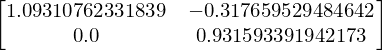

In [9]:
# Parametrize M with steady state values and calibrations

MM = M.subs({   alpha: α,
                beta: β,
                delta : δ, 
                Y_ss : Yss,p
                K_ss : Kss,
                C_ss : Css,
            })

print("M is ...")
MM

In [10]:
# Bind symbols for solution guess - a linear decision function
P = symbols("P")
Q = symbols("Q")
R = symbols("R")
S = symbols("S")

# Eigenvalue(s) R
R1 = (-(M[0,0] - M[1,1]) + sqrt((M[0,0] - M[1,1])**2 + 4*M[0,1]*M[1,0]))/(2*M[0,1])
R2 = (-(M[0,0] - M[1,1]) - sqrt((M[0,0] - M[1,1])**2 + 4*M[0,1]*M[1,0]))/(2*M[0,1])

r1 = R1.subs({   alpha: α,
                beta: β,
                delta : δ, 
                Y_ss : Yss,
                K_ss : Kss,
                C_ss : Css,
            })

r2 = R2.subs({  alpha: α,
                beta: β,
                delta : δ, 
                Y_ss : Yss,
                K_ss : Kss,
                C_ss : Css,
            })

print(r1, r2)

# Evaluate L
L = L.subs({    alpha: α,
                beta: β,
                delta : δ,
                rho: ρ,
                Y_ss : Yss,
                K_ss : Kss,
                C_ss : Css,
            })


-1.66533453693773e-16 0.508450766889464


#### Find that RE-RCE described as a linear Markov map



Now that we know the two possibly distinct solutions for $R$, we can solve for $S$ and then $P$ and $Q$ using these other components of the fixed point mapping:

$$
P = m_{11} + m_{12}R
$$

$$
Q = m_{21} + m_{22}R
$$

$$
S = \frac{1}{m_{12} - (m_{22} - \rho)}\left(l_{21} - l_{11}R\right)
$$



There are two possible solutions for these, especially $P$, which governs the stability of the RE-RCE dynamics. We need to impose a selection rule to ensure that the RE-RCE is well-defined:

In [11]:
eig1 = np.real(MM[0,0] + MM[0,1]*r1)
eig2 = np.real(MM[0,0] + MM[0,1]*r2)

# Consider absolute value of real parts
p1 = np.absolute(eig1)
p2 = np.absolute(eig2)

# Equilibrium selection 
# (Ensure solution outcome is on saddle-path stable manifold)
if p1 < 1.0 and p2 >= 1.0:
    R = r1
    P = eig1  
    case = "Unique local RE-RCE"
elif p1 >= 1.0 and p2 < 1.0:
    R = r2
    P = eig2
    case = "Unique local RE-RCE"
elif p1 < 1.0 and p1 == p2:
    R = r2
    P = eig2
    case = "Unique local RE-RCE"
elif p1 < 1.0 and p2 < 1.0:
    warnings.warn("WARNING: You have an indeterminacy (infinite set) of RE-RCE!")
    P = None
    case = "Indeterminate local RE-RCE"
elif p1 >= 1.0 and p2 >= 1.0:
    warnings.warn("WARNING: You have no RE-RCE!")
    P = None
    case = "No soup for you!"

if case == "Unique local RE-RCE":
    # Solve for others
    Q = MM[1,0] + MM[1,1]*R
    S = L[1,0] - L[0,0]*R

print(case + " ...")

print("\nEigenvalues:")
print(eig1)
print(eig2)

Unique local RE-RCE ...

Eigenvalues:
1.09310762331839
0.931593391942173


Remarks:
* The unstable eigenvalue relates to the forward-looking jump variable $c_{t}$ which has no initial value. 

* The stable eigenvalue relates to the backward-looking state variable $k_{t}$ which has an initial condition.

Thus when selecting $P$, we pick the $R$ such that $|P| < 1$ so that the equilibrium dynamic for $k_{t}$ is locally stable. (If had picked the other one, it will be explosive which implieds that there is no well-defined RE-RCE.)

#### Huddle-up time

So the approximate RE-RCE solution (a.k.a., the linear Markovian mapping, the equilibrium map), given our long-run data discipline is:

In [12]:
# capital %dev
kt = symbols('\hat{k}'+'_{t}')
ktp = symbols('\hat{k}'+'_{t+1}')

# tpf %dev
at = symbols('\hat{a}'+'_{t}')
atp = symbols('\hat{a}'+'_{t+1}')

# consumption %dev
ct = symbols('\hat{c}'+'_{t}')

So the RE-RCE solution is:

In [13]:
relational.Eq(ktp, P*kt + Q*at)

and:

In [14]:
relational.Eq(ct, R*kt + S*at)

#### Equilibrium behavior

A useful way to visualize and understand the equilibrium dynamic behavior of the model is through impulse response functions.

The impulse response functions can be derived recursively. Note that the if a shock hit the model economy $t-j$ periods ago, and the system now is in date $t$, the resulting response of state vector $x_{t}$ is:

$$
x_{t} = \underbrace{A^{t}x_{0}}_{\text{Cumulative multiplier effect from initial state}} 
+ 
\underbrace{\sum_{j=0}^{t-1}A^{j}Be_{t-j}}_{\text{Cumulative multiplier effect from shocks in each date 1 to $t$}}.
$$

This gives us the date $t\geq 1$ outcome of the state vector $x_{t}$ as a function of some shock in period $j \in \{t, t-1, ..., 1 \}$.

Computationally we can calculate these impulse response functions - i.e., evaluate the sums above - recursively. Here's an example pseudocode to implement the impulse responses for a given :

*Given*: $x_{0}$, $(A,B)$, $T$.

While $t \leq T-1$:

1. Get: $e_{t}$

2. Evaluate: 
    * $x_{t+1} \gets A x_{t} + B e_{t}$
    
    * $y_{t} \gets C x_{t}$

3. Store $(x_{t}, y_{t})$

4. Set $x_{t} \gets x_{t+1}$ and $t \gets t+1$

5. Repeat steps 1 to 4





The following function does the job and more. This function computes either

* (deterministic) impulse responses to a one-time shock in date $t=1$ (if *ShockAllPeriods* is set to *False*), or
    
* (stochastic) simulation of the LSDE system (if *ShockAllPeriods* is set to *True*)

The user can control which of the shocks are active in either type of simulation by defining the *shock_index* list.

In [15]:
def simlsde(A, B, C, shock_index=0, T=30, x0=None, ShockAllPeriods=False):
    """Compute impulse response functions 
    for (Gaussian) LSDE model written is state-space form.
    
    A              : N_states x N_states matrix
    B              : N_states x N_shocks matrix
    C              : N_costates x N_states matrix
    shock_index    : integer index of particular 
                     shock(s): 0, 1, ..., nshock-1
    T              : simulation horizon
    x0             : initial x, default is an nvar vector of zeros
    ShockAllPeriods: Boolean switch
                     TRUE if Monte Carlo simulation of data. 
                     FALSE if deterministic initial shock at date 1. 
    """
    
    # Activate shock in location shock_index
    shock_select = np.zeros(B.shape[1])
    shock_select[shock_index] = 1.0
    #print(shock_select)
    # Number of state variables
    N_states = A.shape[0]
    N_shocks = B.shape[1]
    # Defaults ...
    if x0 == None:
        x0 = np.zeros(N_states)
        # print("\nDefaulting to x0 = [0] assumption")
    if ShockAllPeriods == True:
        # print("\nDoing stochastic simulation of model time-series data\n")
        emat = np.random.randn(N_shocks, T)
    else:
        # print("\nDoing one-std-deviation period-1 impulse\n")
        emat = np.zeros((N_shocks, T))
        emat[:,0] = np.ones(N_shocks)
    irf = []
    # Recursion to construct cumulative multiplier effects on x(t)
    x_now = x0.copy()
    for t in range(T):
        # current vector of active shocks
        e_next = np.diag(shock_select).dot( emat[:,t] )
        # apply LSDE model
        x_next = A.dot(x_now) + B.dot(e_next)
        y_now = np.atleast_2d(C.dot(x_now))
        # store impulse response in list irf
        data = np.concatenate((x_now.ravel(), y_now.ravel()), axis=0)
        irf.append(data)
        # update state, repeat and rinse
        x_now = x_next
    # Return irf, a list of T NumPy (1 x nvar) arrays
    return irf

Let's compute a special case of these impulse response functions assuming that the model is hit by an impulse (here it's only through the exogenous TFP shock) one at date $0$.

It's easier to visualize the impulse response functions graphically. Let's set up a function to do this:

In [16]:
def simlsde_plot(data, var_names):
    """
    Plot simulated data
    
    data        :  T x nvar Numpy array
    var_names   :  list of variable names (str type)
         
    """
    
    # Set dimension for auto subplotting
    nvars = len(var_names)
    ncols = 3
    nrows = (nvars + np.mod(nvars, ncols)) / ncols
    
    # map string SHOCK to its location index 
    # shock_index = shock_names.index(shock)
    
    # x-data
    x = range(len(data))
    
    # Loop over calculations and plot simultaneously
    fig = plt.figure(facecolor='white', figsize=(16,4))
    for picture, variable in enumerate(var_names):
        plt.subplot(nrows, ncols, picture+1)
        y = data[:,picture]
        plt.plot(x, y, 'o-.', 
                 x, np.zeros(y.size), '-r'
                )
        #plt.margins(2)
        plt.title(variable)
        plt.xlabel("$t$")
    # Output the object plt
    return plt

In [17]:
# Define Python lists of strings for plotting labels (later)
# var_names = ["$\hat{a}_{t}$", 
#              "$\hat{k}_{t}$", 
#              "$\hat{c}_{t}$", 
#              "$\hat{n}_{t}$", 
#              "$\hat{y}_{t}$"]

var_names = ["$\hat{a}_{t}$", 
             "$\hat{k}_{t}$", 
             "$\hat{c}_{t}$"]

shock_names = ["a"]

# State space representation of RCE solution
# The explicit data-type declaration is to override numpy default
# from inferring from objects in the array
# Here some elements like P, Q, R, S were inherited from SymPy, so they
# are not purely floats. We make them so here.
A = np.asarray([[ρ, 0.0],
                [Q, P  ]], dtype='float64')

B = np.asarray([[σ  ],
                [0.0]], dtype='float64')

# We added the linearized production function and labor clearing conditions
# C_rhs = np.asarray([[S,   R],
#                     [1.0, α],
#                     [1.0, α]], dtype='float64')
C_rhs = np.asarray([[S,   R]], dtype='float64')
C_lhs = np.eye(1)
# C_lhs = np.eye(3)
# C_lhs[1,1] = α
# C_lhs[2,1] = -(1.0 - α)

# Observation equation 
C = np.linalg.inv(C_lhs) @ C_rhs

In [18]:
# Assume shock to ...
shock = "a"
# map string SHOCK to its location index
shock_index = shock_names.index(shock)

# Evaluate impulse response functions given SHOCK
impulse = simlsde(A, B, C, shock_index, T=100, ShockAllPeriods=False)
irf = np.asarray(impulse)

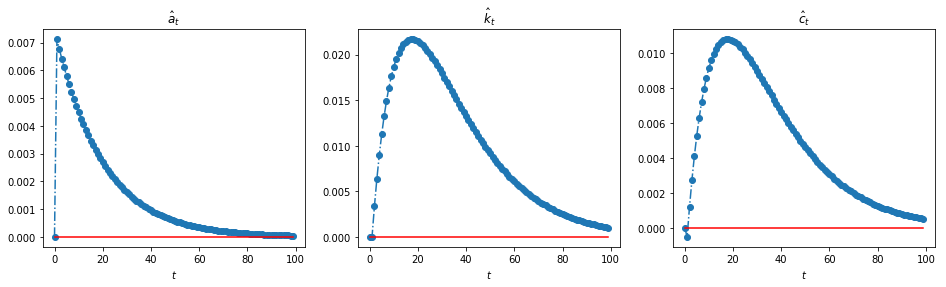

In [19]:
# Plot the impulse responses
plt = simlsde_plot(irf, var_names)

In [20]:
# Assume shock to all variables
shock = shock_names
print("You are activating these shocks ...\n")
print(shock_names)

# map string SHOCK to its location index
shock_index = [ shock_names.index(shock) for shock in shock_names ]
data = simlsde(A,B,C, shock_index, T=1000, ShockAllPeriods=True)
data = np.asarray(data[850::], dtype="float64")

You are activating these shocks ...

['a']


Then we plot the synthetic data we just generated by Monte Carlo simulation of the model in the last step:

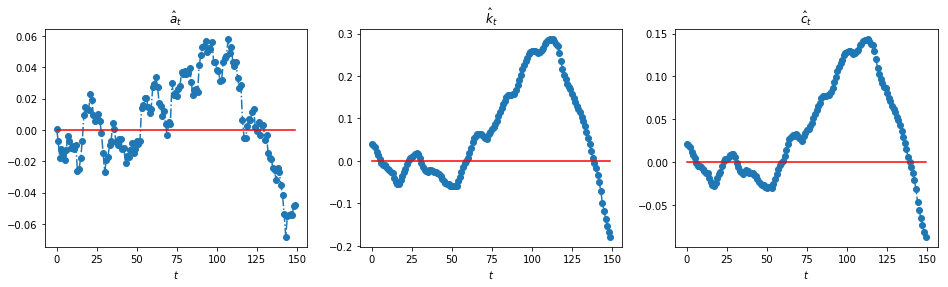

In [21]:
plt = simlsde_plot(data, var_names)

Let's characterize the empirical distribution our simulated data:

In [22]:
# instantiate pandas dataframe
df = pandas.DataFrame(data, columns=var_names)

# display simulated sample data's covariance matrix
df.cov()

,$\hat{a}_{t}$,$\hat{k}_{t}$,$\hat{c}_{t}$
$\hat{a}_{t}$,0.000749,0.002337,0.001133
$\hat{k}_{t}$,0.002337,0.013588,0.006737
$\hat{c}_{t}$,0.001133,0.006737,0.003342


#### An extended state-space representation and autocovariogram

What if we want to jointly calculate this model's implied dynamic and stochastic behavior for all the relevant variables like consumption and labor?

Let's repack our state-space model above by extending the state-vector as such:

$$
x_{t+1} = \mathbf{F} x_{t} + \mathbf{G}e_{t+1}
$$

where 
$$
x_{t} = (s_{t}, y_{t-1}, y_{t-2})
$$
$s_{t} := (\hat{a}_{t}, \hat{k}_{t})$ and $y_{t} := (\hat{c}_{t}, \hat{n}_{t}, \hat{y}_{t})$. The coefficient matrices are now:
$$
\mathbf{F} = \left(\begin{matrix}
             A & 0_{2 \times 3} & 0_{2 \times 3}
             \\
             C & 0_{3 \times 3} & 0_{3 \times 3}
             \\
             0_{3 \times 3} & I_{3} & 0_{3 \times 3}
             \end{matrix}\right),
\mathbf{G} = \left(\begin{matrix}
             B 
             \\
             0_{3 \times 1} 
             \\
             0_{3 \times 1} 
             \end{matrix}\right),
$$

This covariance matrix for this system is defined by 

$$
C_{x}(0) = \mathbb{E}\left\{ (x_{t+1} - \mu^{x})(x_{t+1} - \mu^{x}) \right\} = \mathbb{E} \left\{ (x_{t} - \mu^{x})(x_{t} - \mu^{x}) \right\},
$$

for all $t$.

You can derive from first priciples (i.e., use the definition of the LSDE above) the covariance-stationary (long-run) covariance matrix, $C_{x}(0)$, which satisfies the recursive Lypunov function:

$$
C_{x}(0) = \mathbf{F} C_{x}(0) \mathbf{F}^{T} + \mathbf{G}\mathbf{G}^{T}
$$

(This is a recursion on $C_{x}(0)$ since it appears on both sides of the equation---i.e., it is a fixed point of the matrix quadratic equation.)

Since $F$ is a stable matrix, this recursion can be shown to have a unique fixed point $C_{x}(0)$. Let's take this claim on faith, and proceed to caculate this theoretical (i.e., model-derived) covariance matrix. Remember, the long run distribution of $x_{t}$ is Normal---i.e., $x_{t} \sim \mathbf{N}(\mu, C_{x}(0) )$. Therefore the stochastic process of $x_{t}$ in the long run can be sufficiently described by the mean $\mu_{x}$ and covariance $C_{x}(0)$.

Here's a pseudocode for finding $C_{x}(0)$:

0. Fix $\epsilon > 0$ and $\delta \gets 1.0$

1. Set $\mathbf{V} \gets \mathbf{I}$

2. Evaluate:

    $$
    \tilde{\mathbf{V}} \gets \mathbf{F} \mathbf{V} \mathbf{F}^{T} + \mathbf{G}\mathbf{G}^{T}
    $$
    
3. Calculate distance 

    $$
    \delta \gets \max_{i} \max_{j} |\tilde{\mathbf{V}}_{ij} - \mathbf{V}_{ij} |
    $$
    
4. Update 

    $$
    \mathbf{V} \gets \tilde{\mathbf{V}}
    $$
    
5. Repeat Steps 2 - 4 until $\delta < \epsilon$

The resulting fixed point, the matrix $\mathbf{V} = \tilde{\mathbf{V}}$, is $C_{x}(0)$.

In [23]:
def mdistance(A, B):
    """metric for distance between two 2D arrays"""
    d = (np.absolute(A - B)).max()
    return d

def lyapunov(F, G):
    """Implementation of recursion on Lyapunov equation"""
    TOL = 1e-12
    MAXITER = 1000
    d = 1.0
    V = np.eye(F.shape[0])

    # Loop to successively approximate V
    for n in range(MAXITER):
        V_new = (F.dot(V)).dot(F.T) + G.dot(G.T)
        d = mdistance(V_new, V)
        V = V_new
        if d < TOL:
            break
    return V

In [24]:
# Rewrite state-space model (A,B,C) as VAR/LSDE form (F,G)
ny = np.atleast_2d(C).shape[0]
nx = A.shape[1]
nz = B.shape[1]

# VAR transition matrix
F = np.zeros((nx+2*ny, nx+2*ny))
F[0:nx, 0:nx] = A
F[nx:nx+ny, 0:nx] = C
F[nx+ny:nx+2*ny,nx:nx+ny] = np.eye(ny)

# VAR shock loading factor
G = np.zeros((nx+ny+ny, nz))
G[0:nx, :] = B


In [25]:
# Let's evaluate an instance for our model above
Cx0 = lyapunov(F, G)
Cx0 = Cx0[0:nx+ny, 0:nx+ny]

# Previous Monte Carlo simulation's empirical covariance matrix
Cx0_monty_sample = np.asarray(df.cov())

# Display the two results
print("Theoretical cov-mat:\n")
print(Cx0)

print("\nMonte-Carlo sample's cov-mat:\n")
print(Cx0_monty_sample)

# Check that these two are the same
test = mdistance(Cx0, Cx0_monty_sample)
precision = 1e-3
if test < precision:
    print("\nYour theoretical cov-mat agrees with the Monte Carlo sample's up to %0.4g precision" % (precision))

Theoretical cov-mat:

[[0.00051994 0.00203474 0.00094641]
 [0.00203474 0.01447307 0.00718754]
 [0.00094641 0.00718754 0.00359185]]

Monte-Carlo sample's cov-mat:

[[0.00074948 0.00233666 0.00113281]
 [0.00233666 0.01358836 0.0067367 ]
 [0.00113281 0.0067367  0.00334174]]

Your theoretical cov-mat agrees with the Monte Carlo sample's up to 0.001 precision


We have derived before that 

$$
C_{x}(j) = A^{j}C_{x}(0).
$$

Each diagonal element of $C_{x}(j)$ is the lag$-j$ autocovariance of the corresponding variable in the vector $x_{t}$. The off-diagonals would be the cross-covariances. We call $\{ C_{x}(j): j = 0,1,2, ...\}$ the autocovariogram of the LSDE process $\{x_{t}\}_{t=0}^{\infty}$.

Here's how we can compute the autocovariogram for $j = 0,1,..., J$. 



In [26]:
def lsde_autocov(F, G, J=21):
    """Compute the autocovariogram of a Gaussian LSDE model"""
    # Get covariance matrix (j=0)
    Cx0 = lyapunov(F, G)
    # (Fast C compiled) loop to get autocovariogram (stored as python list of arrays)
    # for each j, the j-lag autocovariance matrix is flattened into a vector
    CxJ = [ (np.linalg.matrix_power(F, j).dot(Cx0)).flatten() for j in range(J) ]
    return CxJ

In the example below, we set $J =4$. 

In [27]:
# Evaluate (python list) autocovariogram
CxJ = lsde_autocov(F, G, J=4)

Let's write a function to render visual plots of the autocovariogram. Each diagram plots these functions as a function of the lag interval $J = 0, 1, ...$.

In [28]:
def covariogram_plot(CxJ, var_names):
    """Create subplots of nvars x nvars figures of autocovariogram or autocorrelations"""
    
    # Convert list of numpy arrays into numpy array
    AC = np.asarray(CxJ)
    # Number of variables
    nvars = len(var_names)
    # Number of lags
    J = AC.shape[0]
    nfigs = AC.shape[1]
    # Create Cartesian product VARNAMES x VARNAMES
    varmat = [ [i,j] for i in var_names for j in var_names ]
    # Set dimension for auto subplotting
    ncols = 2
    nrows = (nfigs + np.mod(nfigs, ncols)) / 2
    # Loop over each element of autocovariogram
    x = np.arange(J)
    gambar = plt.figure(facecolor='white',figsize=(10,16))
    for idx_subplot, labels in enumerate(varmat):
        plt.subplot(nrows, ncols, idx_subplot+1)
        y = AC[:,idx_subplot]
        plt.stem(x,y)
        plt.xlabel('lag, $j$')
        plt.title('('+labels[0]+','+labels[1]+'$_{-j}$)')
        # plt.margins(0.1)
        plt.tight_layout()
    return plt

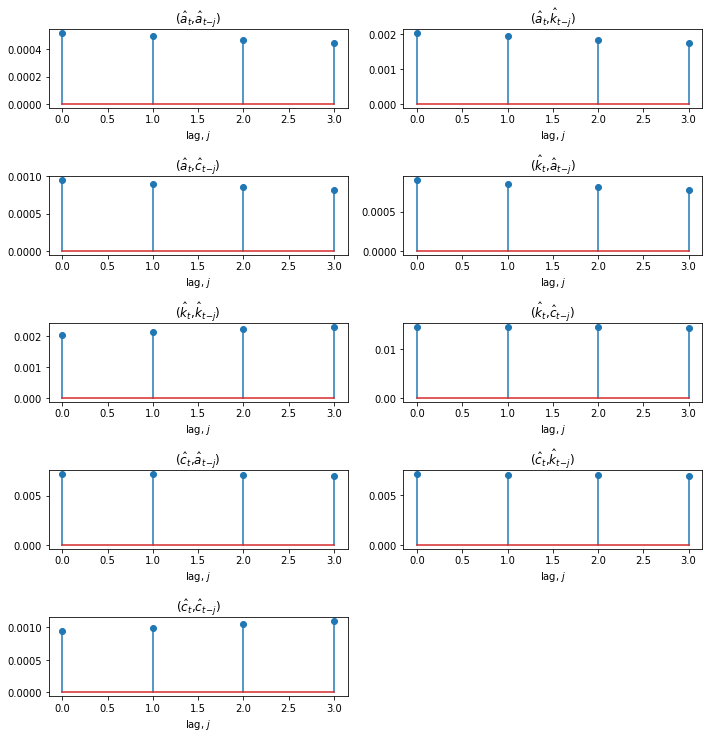

In [29]:
plt = covariogram_plot(CxJ, var_names)

Covariances are difficult to interpret in terms of magnitudes since different variables may have different units or scales. So the covariogram above is instructive in terms of *directions* of comovement between the variables of the model. It is difficult to assess the strength of their comovements. One way to overcome this problem is to re-scale the covariogram and report its related correlation diagram. We do this next.

Now we look at autocorrelations, where we normalize each element of $C_{x}(j)$ by appropriate products of *standard deviations* of each variable. This is done in the function below:

In [30]:
def lsde_autocorr(F, G, J=21):
    """Compute the autocovariogram of a Gaussian LSDE model"""
    # Get covariance matrix (j=0)
    Cx0 = lyapunov(F, G)
    # Extract diagonal of Cx0 and take sqrt()
    std = np.sqrt(np.diag(Cx0))
    # List of cross-products of std elements
    V = [ i*j for i in std for j in std ]
    V = np.asarray(V)
    # (Fast C compiled) loop to get autocovariogram (stored as python list of arrays)
    # for each j, the j-lag autocovariance matrix is flattened into a vector
    # then normalized by V
    CCJ = [ (np.linalg.matrix_power(F, j).dot(Cx0)).flatten()/V for j in range(J) ]
    return CCJ


Let's evaluate these auto- and cross-correlations. By definition, correlations are statistics whose outcomes lie in the set $[-1,1]$. This normalized information gives us useful summary statistics of the *magnitude* and *directions* of comovement between the endogenous variables in the LSDE at different lags (i.e., phases of the model's business cycle).

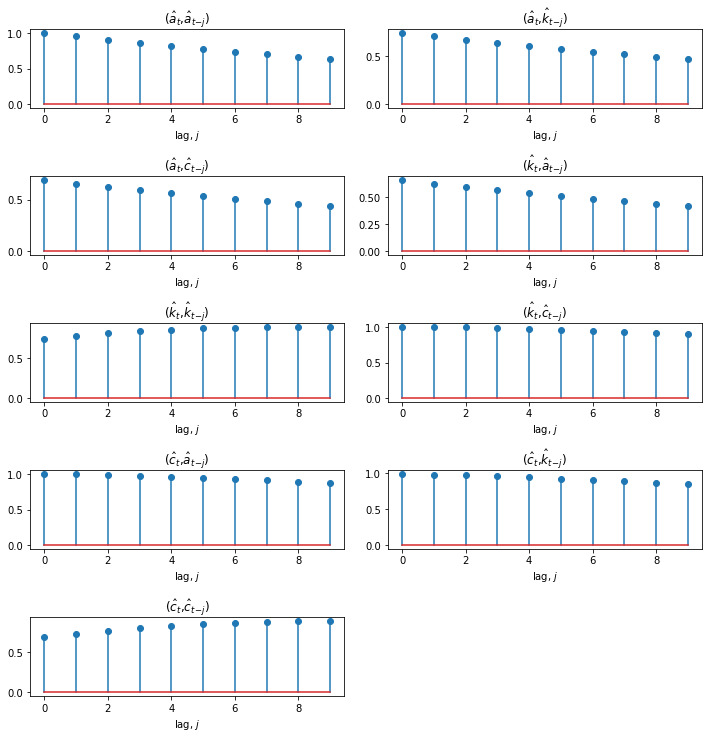

In [31]:
CCJ = lsde_autocorr(F, G, J=10)
plt = covariogram_plot(CCJ, var_names)

So what can you conclude from the autocorrelations above?

## Problem 2 (Models vs Reality, Optional*)

*$^{\ast}$Not assessable for this course*

Models such as the one above can be confronted with observed data.

1. Download observable counterparts for output, consumption, average hours worked, and investment. Use U.S. macroeconomic data as an example. You will need to construct a filtered version of this data as the raw time series data is non-stationary (i.e., its has some unobserved trend components). Use a band-pass filter for example.

2. Given your filtered, stationary components of the time series, compute their statistics that correspond to what you have obtained from simulating the approximate log-linearized solution of your model. 

3. *Informal empiricism*. Eyeball what you have from the observed data and from your model's synthetic data. How "close" is the model to the "data" in terms of these partial information targets?

4. *A formal empirical strategy*. Suggest how you would estimate this model more rigorously using classical maximum likelihood methods. To do so, you need to construct the model's data likelihood function (recursively) using the famous Kalman filter. In the last problem, we pretended that we have estimated the log-TFP process. However, TFP data (and physical capital data) may not be reliable since it is (they are) not directly observable or measured. How would you go about dealing with this problem in your estimation strategy?

5. Suppose your friend proposed a variation on your model above as a better candidate of the true data generating process underlying the observed time series data. How would you go about testing whose model is more preferred? (Hint: You need to do a likelihood ratio test, if you're finding classical maximum likehood estimators of the two models.)

    At last, when I woke from my slumber and opened my eyes, 
    I saw thee standing by me, flooding my sleep with thy smile. 
    How I had feared that the path was long and wearisome, 
    and the struggle to reach thee was hard!

excerpt from *The Journey* (Rabindranath Tagore)